# ***`Insurance Claim Prediction`***




Predict whether the policyholder will file a claim in the next 6 months or not. 




# *** Problem Statement***

* CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.



* As it's a fast growing startup, the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months. 


* Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.

In [ ]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#loading the data set
df = pd.read_csv(r"/content/train.csv")
df.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
#lets check the shape 
print('Shape of train dataset:',df.shape)

Shape of train dataset: (58592, 44)


In [ ]:
#check the data types
df.dtypes

policy_id                            object
policy_tenure                       float64
age_of_car                          float64
age_of_policyholder                 float64
area_cluster                         object
population_density                    int64
make                                  int64
segment                              object
model                                object
fuel_type                            object
max_torque                           object
max_power                            object
engine_type                          object
airbags                               int64
is_esc                               object
is_adjustable_steering               object
is_tpms                              object
is_parking_sensors                   object
is_parking_camera                    object
rear_brakes_type                     object
displacement                          int64
cylinder                              int64
transmission_type               

In [ ]:
#lets check for Null Values
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

In [ ]:
df.drop(columns = 'policy_id', inplace = True)

In [ ]:
df.head(2)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,Yes,No,No,No,Yes,0,0


In [ ]:
#Lets check which columns contains '?'
df[df.columns[(df == '?').any()]].nunique()


Series([], dtype: float64)

In [ ]:
#Lets chcek the value counts for categorical data
for i in df.columns:
    if df[i].dtypes == 'int64':
        print(df[i].value_counts())
        print('---------'*10)

8794     13654
27003     7342
34738     6979
4076      6101
7788      3660
5410      3423
73430     3155
17804     2734
6112      2167
34791     1589
4990      1468
6108      1212
27742      952
13051      890
290        771
21622      665
65567      492
16206      401
3264       379
35036      242
16733      207
20905      109
Name: population_density, dtype: int64
------------------------------------------------------------------------------------------
1    38126
3    14018
2     2373
5     2114
4     1961
Name: make, dtype: int64
------------------------------------------------------------------------------------------
2    40425
6    16958
1     1209
Name: airbags, dtype: int64
------------------------------------------------------------------------------------------
1197    17796
796     14948
1493    14018
998      4173
999      2373
1498     2114
1497     1598
1196     1209
1199      363
Name: displacement, dtype: int64
----------------------------------------------------------

In [ ]:
#Lets chcek the value counts for categorical data
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('---------'*10)

C8     13654
C2      7342
C5      6979
C3      6101
C14     3660
C13     3423
C10     3155
C9      2734
C7      2167
C12     1589
C1      1468
C11     1212
C19      952
C6       890
C15      771
C4       665
C17      492
C16      401
C21      379
C18      242
C22      207
C20      109
Name: area_cluster, dtype: int64
------------------------------------------------------------------------------------------
B2         18314
A          17321
C2         14018
B1          4173
C1          3557
Utility     1209
Name: segment, dtype: int64
------------------------------------------------------------------------------------------
M1     14948
M4     14018
M6     13776
M8      4173
M7      2940
M3      2373
M9      2114
M5      1598
M10     1209
M2      1080
M11      363
Name: model, dtype: int64
------------------------------------------------------------------------------------------
Petrol    20532
CNG       20330
Diesel    17730
Name: fuel_type, dtype: int64
-------------------------------

In [ ]:
for col in df.columns:
    print(col,df[col].nunique())
    print('-'*35)

policy_tenure 58592
-----------------------------------
age_of_car 49
-----------------------------------
age_of_policyholder 75
-----------------------------------
area_cluster 22
-----------------------------------
population_density 22
-----------------------------------
make 5
-----------------------------------
segment 6
-----------------------------------
model 11
-----------------------------------
fuel_type 3
-----------------------------------
max_torque 9
-----------------------------------
max_power 9
-----------------------------------
engine_type 11
-----------------------------------
airbags 3
-----------------------------------
is_esc 2
-----------------------------------
is_adjustable_steering 2
-----------------------------------
is_tpms 2
-----------------------------------
is_parking_sensors 2
-----------------------------------
is_parking_camera 2
-----------------------------------
rear_brakes_type 2
-----------------------------------
displacement 9
--------------

# **EDA**

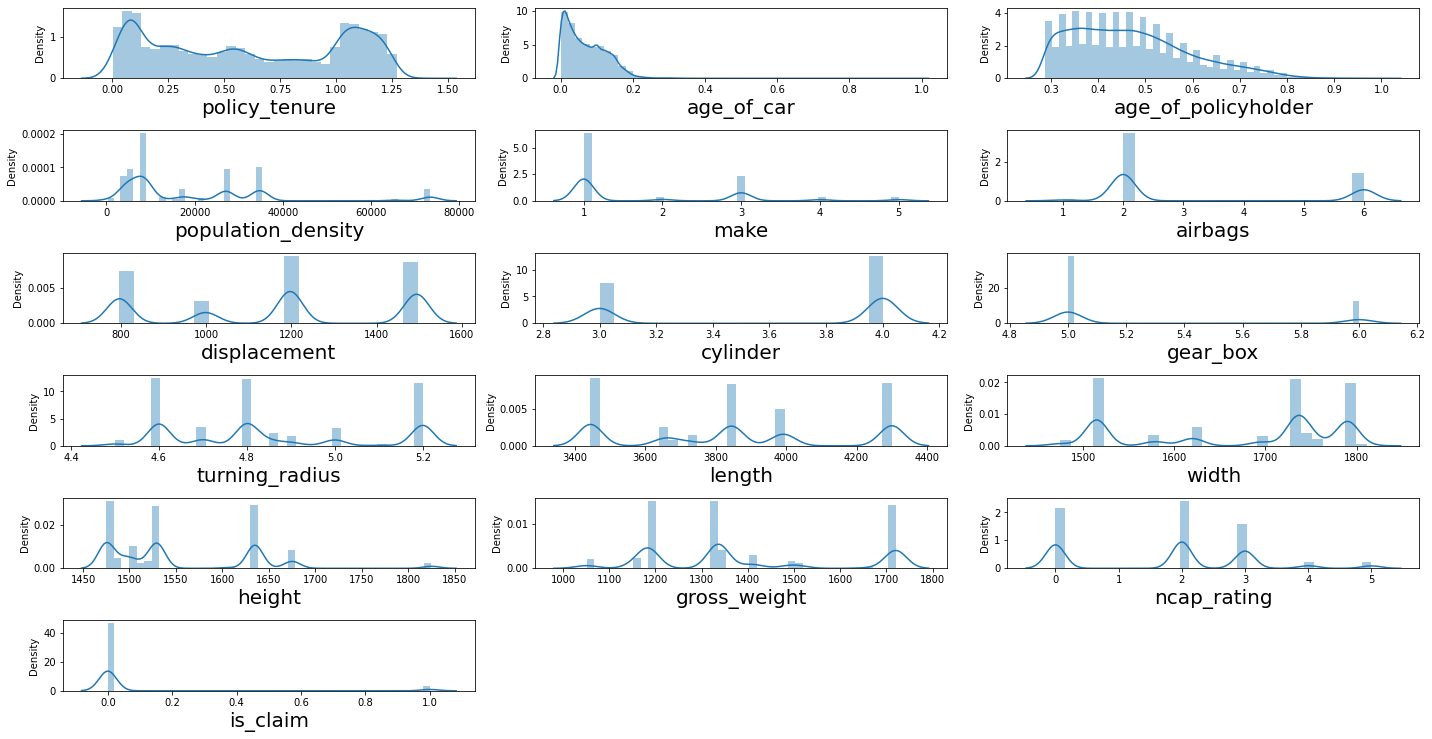

In [ ]:
#lets check distribution for continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (20,20))
plotnumber = 1
for column in num_data:
    if plotnumber <=45:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

# **Data processing**

# **Apply label encoder to target variable**

In [ ]:
from sklearn.preprocessing import LabelEncoder
leb_enc = LabelEncoder()
df2 = leb_enc.fit_transform(df["is_claim"])
pd.Series(df2)
df["is_claim"] = df2

In [ ]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

# ***Heat map for checking correlation***

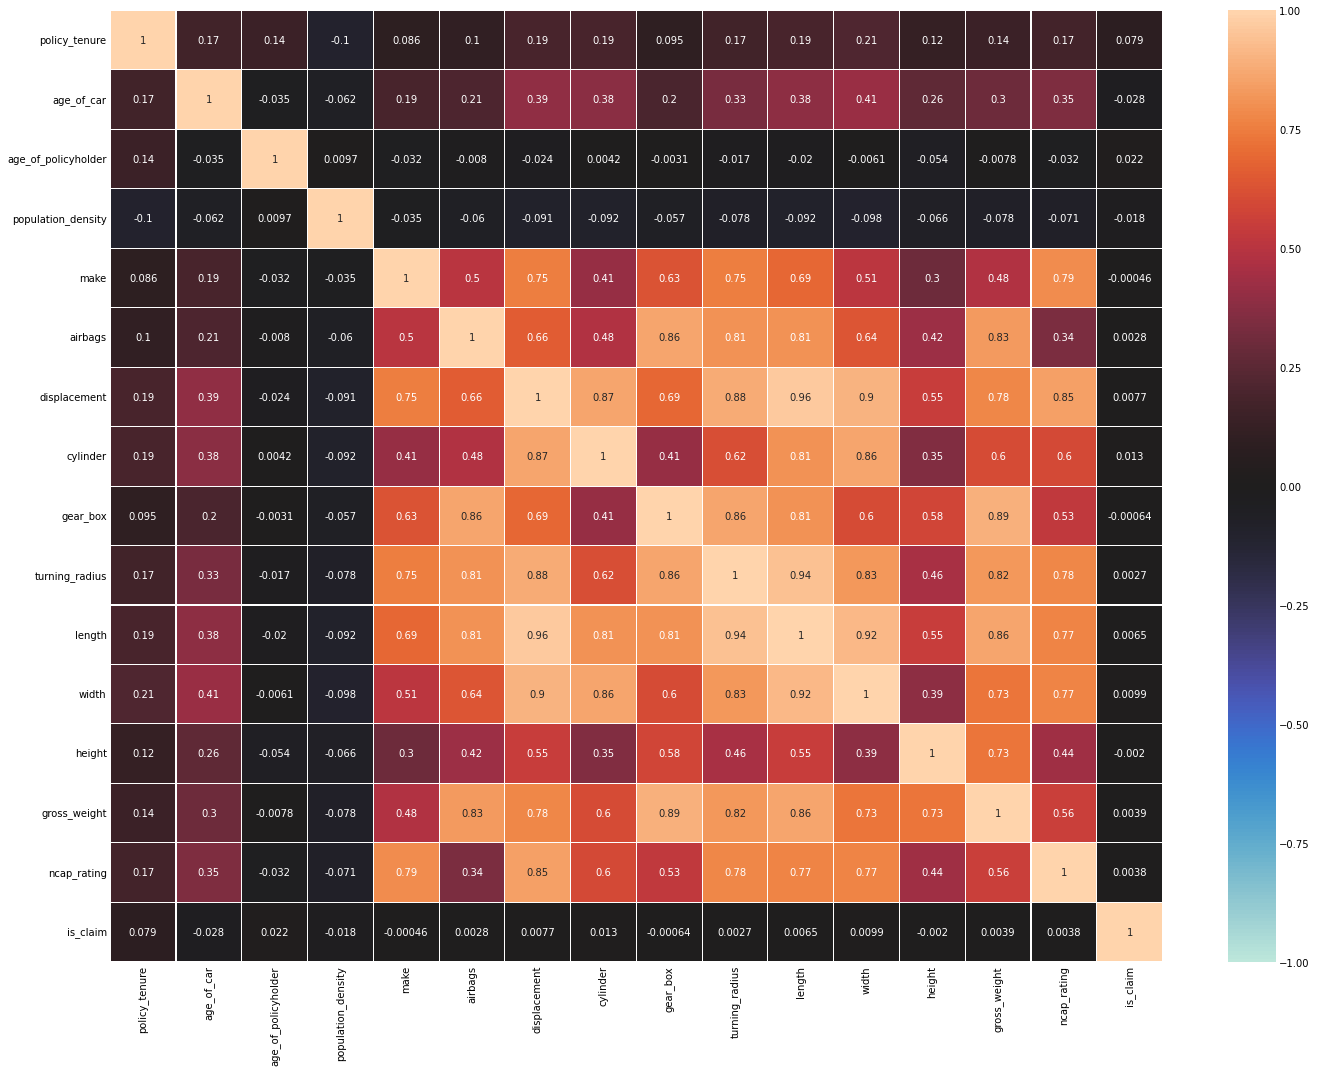

In [ ]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

In [ ]:
#lets describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


## **Checking for outliers using box plots**

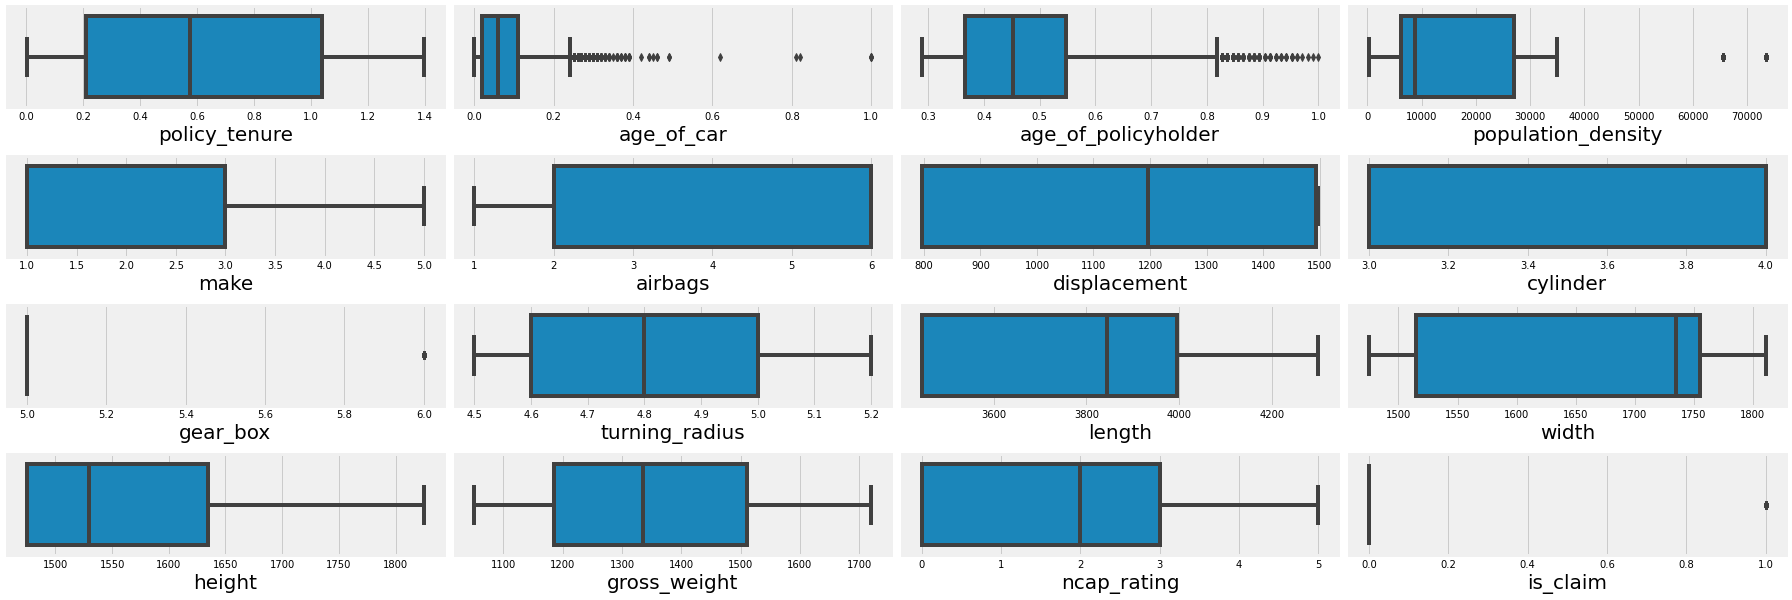

In [ ]:
#lets check outliers from continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (25,10))
plotnumber = 1
for column in num_data:
    if plotnumber <=45:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

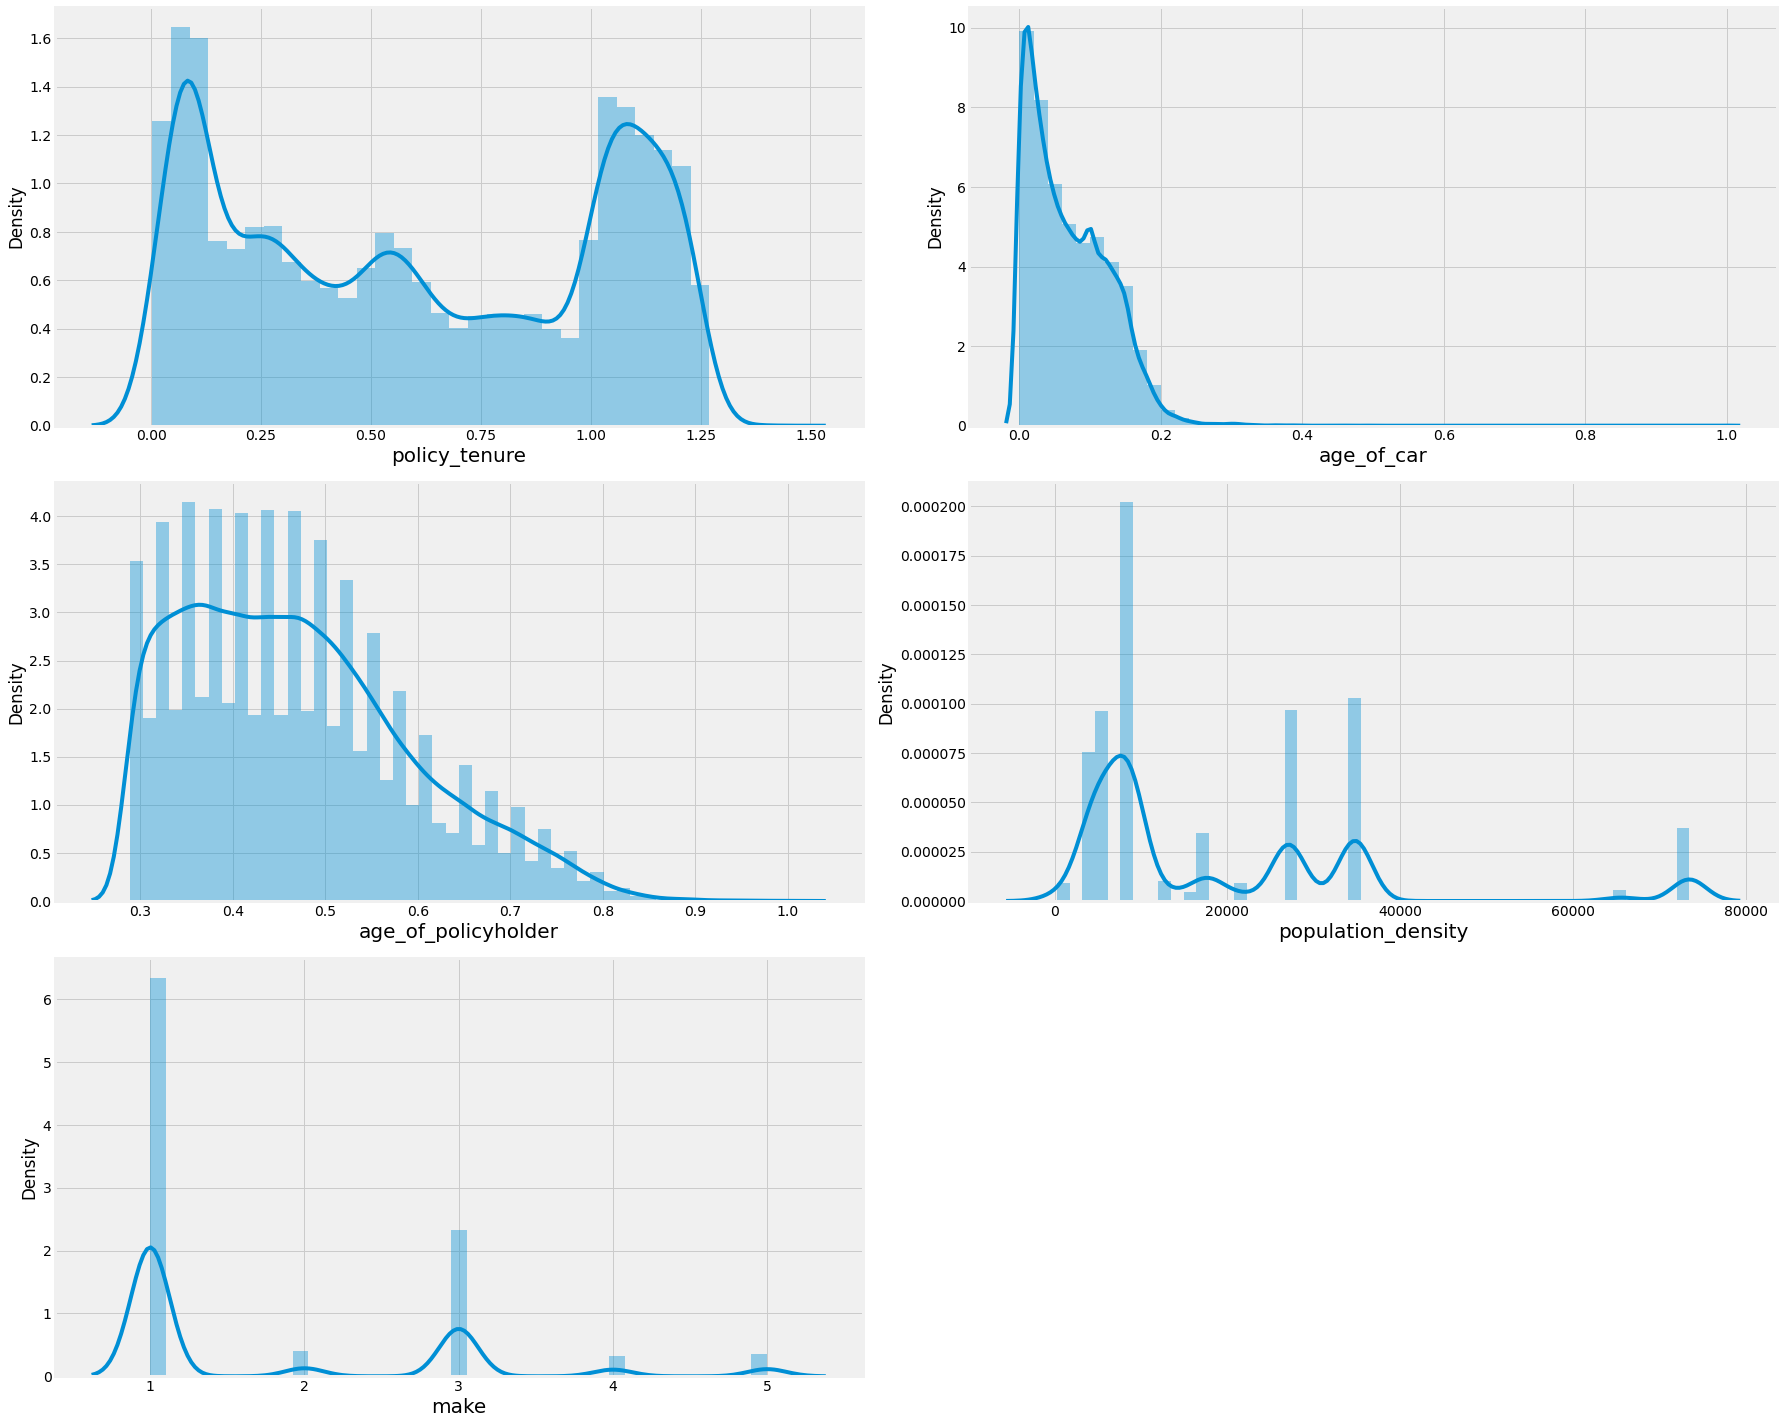

In [ ]:
#lets see the destribution of numerical data
num_data = df._get_numeric_data()
plt.figure(figsize = (25,20))
plt.style.use('fivethirtyeight')
plotnumber = 1
for column in num_data:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [ ]:
#lets check for skewness
df.skew()

policy_tenure          0.053588
age_of_car             1.094081
age_of_policyholder    0.640049
population_density     1.674178
make                   1.197457
airbags                0.905946
displacement          -0.105317
cylinder              -0.525074
gear_box               1.183054
turning_radius         0.420983
length                 0.145801
width                 -0.488392
height                 1.035498
gross_weight           0.546949
ncap_rating            0.085147
is_claim               3.563967
dtype: float64

# ***Separate features and label as x & y respectively***

In [ ]:
x = df.drop(columns = 'is_claim')
y = df['is_claim']

In [ ]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [ ]:
x.skew()

policy_tenure          0.053588
age_of_car             1.094081
age_of_policyholder    0.640049
population_density     1.674178
make                   1.197457
airbags                0.905946
displacement          -0.105317
cylinder              -0.525074
gear_box               1.183054
turning_radius         0.420983
length                 0.145801
width                 -0.488392
height                 1.035498
gross_weight           0.546949
ncap_rating            0.085147
dtype: float64

In [ ]:
#Lets treat the skewness from numerical columns
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.cbrt(x[index])

In [ ]:
#check the skewness again
x.skew()

policy_tenure          0.053588
age_of_car             0.792845
age_of_policyholder    0.472141
population_density    -0.446592
make                   0.896483
airbags                0.838431
displacement          -0.105317
cylinder              -0.525074
gear_box               1.183054
turning_radius         0.420983
length                 0.145801
width                 -0.488392
height                 0.922016
gross_weight           0.377095
ncap_rating            0.085147
dtype: float64

In [ ]:
#lets separate numerical and categorical features for scaling and encoding
num = x._get_numeric_data()
cat = x.select_dtypes(include=['object'])

## ***Applying StandardScaler to numerical features***

In [ ]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
x_num = scaler.fit_transform(num)
x_num = pd.DataFrame(x_num,columns=num.columns)

In [ ]:
#combine both numerical and categorical features
X = pd.concat([x_num,cat], axis = 1)

In [ ]:
#lets have a look at our features
X.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,-0.230283,-0.327096,1.412462,-0.964127,-0.701921,-0.601495,-1.375713,-1.296417,-0.570334,-1.108893,...,No,No,No,No,No,Yes,No,No,No,Yes
1,0.148188,-0.885975,-0.768508,0.808551,-0.701921,-0.601495,-1.375713,-1.296417,-0.570334,-1.108893,...,No,No,No,No,No,Yes,No,No,No,Yes
2,0.555022,-0.885975,-0.683514,-1.176506,-0.701921,-0.601495,-1.375713,-1.296417,-0.570334,-1.108893,...,No,No,No,No,No,Yes,No,No,No,Yes
3,0.697883,0.744287,-0.267210,0.575224,-0.701921,-0.601495,0.130093,0.771357,-0.570334,-0.231926,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,-0.035840,0.744287,1.340928,1.073010,0.424956,-0.601495,-0.613422,-1.296417,-0.570334,0.645040,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes


# **Encoding**

In [ ]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in X.columns:
    if X[i].dtypes == "object" :
        X[i] = enc.fit_transform(X[i].values.reshape(-1,1))

In [ ]:
#lets have a look at data after encoding
X.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,-0.230283,-0.327096,1.412462,-0.964127,-0.701921,-0.601495,-1.375713,-1.296417,-0.570334,-1.108893,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.148188,-0.885975,-0.768508,0.808551,-0.701921,-0.601495,-1.375713,-1.296417,-0.570334,-1.108893,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.555022,-0.885975,-0.683514,-1.176506,-0.701921,-0.601495,-1.375713,-1.296417,-0.570334,-1.108893,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.697883,0.744287,-0.267210,0.575224,-0.701921,-0.601495,0.130093,0.771357,-0.570334,-0.231926,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,-0.035840,0.744287,1.340928,1.073010,0.424956,-0.601495,-0.613422,-1.296417,-0.570334,0.645040,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0


In [ ]:
#check the shape
X.shape

(58592, 42)

In [ ]:
#check value count for target variable
y.value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

## ***Over sampling***

In [ ]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

In [ ]:
#lets check the count of target variable now
y_over.value_counts()

0    54844
1    54844
Name: is_claim, dtype: int64

# ***Finding Best random state***

In [ ]:
#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(50,100):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.590146597622347 on Random State 59


In [ ]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 59)

## ***Model Building with Evaluation Metrics***

## ***LogisticRegression model***

In [ ]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
accuracy = accuracy_score(y_test,predlr)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 58.092042885274594
roc_auc_score: 58.10469727272155
---------------------------------------------------
Confusion Matrix : 
 [[7624 6150]
 [5342 8306]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.59      0.55      0.57     13774
           1       0.57      0.61      0.59     13648

    accuracy                           0.58     27422
   macro avg       0.58      0.58      0.58     27422
weighted avg       0.58      0.58      0.58     27422


Cross validation score : 42.69558406451666

Accuracy Score - Cross Validation Score : 15.396458820757935


# **DecisionTreeClassifier model**

In [ ]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test,pred_dt)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

#cross validation score
scores = cross_val_score(dt, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 92.05382539566772
roc_auc_score: 92.05581920658234
---------------------------------------------------
Confusion Matrix : 
 [[12620  1154]
 [ 1025 12623]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     13774
           1       0.92      0.92      0.92     13648

    accuracy                           0.92     27422
   macro avg       0.92      0.92      0.92     27422
weighted avg       0.92      0.92      0.92     27422


Cross validation score : 53.195451093128376


Accuracy Score - Cross Validation Score : 38.85837430253934


# **RandomForestClassifier model**

In [ ]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
pred_rf = model.predict(x_test)
accuracy = accuracy_score(y_test,pred_rf)*100

print(f"Accuracy Score:", accuracy)
print(f"\nroc_auc_score: {roc_auc_score(y_test,pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

#cross validation score
scores = cross_val_score(rf, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 91.07286120633069

roc_auc_score: 91.07538804076121
---------------------------------------------------
Confusion Matrix : 
 [[12362  1380]
 [ 1068 12612]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91     13742
           1       0.90      0.92      0.91     13680

    accuracy                           0.91     27422
   macro avg       0.91      0.91      0.91     27422
weighted avg       0.91      0.91      0.91     27422


Cross validation score : 91.59162311297686


Accuracy Score - Cross Validation Score : -0.5187619066461764


# ***KNeighborsClassifier model***

In [ ]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
accuracy = accuracy_score(y_test,pred_kn)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

#cross validation score
scores = cross_val_score(kn, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 76.45685945591131
roc_auc_score: 76.53927319613162
---------------------------------------------------
Confusion Matrix : 
 [[ 8072  5702]
 [  754 12894]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.91      0.59      0.71     13774
           1       0.69      0.94      0.80     13648

    accuracy                           0.76     27422
   macro avg       0.80      0.77      0.76     27422
weighted avg       0.80      0.76      0.76     27422


Cross validation score : 47.30052065281315


Accuracy Score - Cross Validation Score : 29.156338803098166


## ***XGBClassifier model***

In [ ]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_xgb)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

#cross validation score
scores = cross_val_score(xgb, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 93.16242433082927
roc_auc_score: 93.13900528903105
---------------------------------------------------
Confusion Matrix : 
 [[13531   243]
 [ 1632 12016]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94     13774
           1       0.98      0.88      0.93     13648

    accuracy                           0.93     27422
   macro avg       0.94      0.93      0.93     27422
weighted avg       0.94      0.93      0.93     27422


Cross validation score : 55.24577664414843

Accuracy Score - Cross Validation Score : 37.91664768668084


# **ExtraTreesClassifier model**

In [ ]:
#lets check with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
pred_ext = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_ext)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_ext)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_ext)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_ext)}")

#cross validation score
scores = cross_val_score(ext, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 93.16242433082927
roc_auc_score: 93.13900528903105
---------------------------------------------------
Confusion Matrix : 
 [[13531   243]
 [ 1632 12016]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.89      0.98      0.94     13774
           1       0.98      0.88      0.93     13648

    accuracy                           0.93     27422
   macro avg       0.94      0.93      0.93     27422
weighted avg       0.94      0.93      0.93     27422


Cross validation score : 77.59823904681203

Accuracy Score - Cross Validation Score : 15.564185284017242


# ***AUC & ROC Curve***

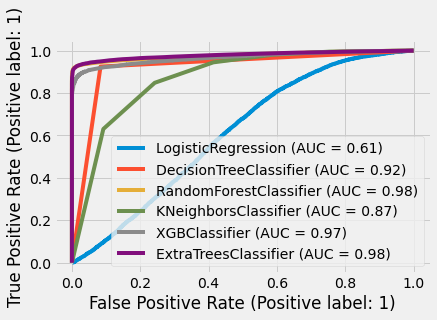

<Figure size 1800x1800 with 0 Axes>

In [ ]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(ext, x_test, y_test, ax = disp.ax_)
plt.figure(figsize = (25,25))
plt.show()

We can see KNeighborsClassifier is giving least difference in accuracy and cv score but its AUC is very less

RandomForestClassifier is giving least in accuracy and cv score next to KNeighborsClassifier, and its AUC also High, that is it is showing better model performance than KNeighborsClassifier.

ExtraTreesClassifier and XGBClassifier are showing almost same AUC as RandomForestClassifier, but their the difference in accuracy and cv score is higher than RandomForestClassifier.

Considering above observations I am selecting RandomForestClassifier as a best suitable algorithm for this model.

# ***Hyperparameter Tuning***

In [ ]:
#lets selects different parameters for tuning
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[500,700,1000,1200],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2]
                }

In [ ]:
#train the model with given parameters using GridSearchCV
#GCV =  GridSearchCV(RandomForestClassifier(), grid_params, cv = 5)
#GCV.fit(x_train,y_train)

In [ ]:
#GCV.best_params_       #printing the best parameters found by GridSearchCV

In [ ]:
#lets check the results of final model with best parameters
#model = RandomForestClassifier(criterion = 'gini', max_depth = 22, min_samples_split = 2,  n_estimators = 1200)
#model.fit(x_train,y_train)
#pred = model.predict(x_test)

#print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
#print("--------------------------------------------------------")

#print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")
#print("--------------------------------------------------------")

#print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
#print("------------------------------------------------------------------------")
#print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

# **AUC ROC CURVE for final model**


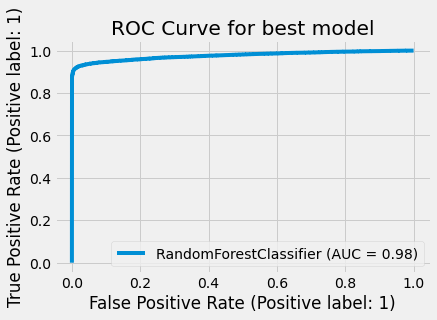

In [ ]:
plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve for best model')
plt.show()

Great after hyperparameter tuning we got improvement in roc curve and AUC also.

# ***Test_Data_Set***

In [ ]:
test = pd.read_csv('/content/test.csv')
test.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,...,No,No,No,No,Yes,No,No,No,Yes,0


In [ ]:
L_ID = test['policy_id']
test = test.drop(columns='policy_id')

In [ ]:
test.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating'],
      dtype='object')

In [ ]:
test.shape

(39063, 42)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     39063 non-null  float64
 1   age_of_car                        39063 non-null  float64
 2   age_of_policyholder               39063 non-null  float64
 3   area_cluster                      39063 non-null  object 
 4   population_density                39063 non-null  int64  
 5   make                              39063 non-null  int64  
 6   segment                           39063 non-null  object 
 7   model                             39063 non-null  object 
 8   fuel_type                         39063 non-null  object 
 9   max_torque                        39063 non-null  object 
 10  max_power                         39063 non-null  object 
 11  engine_type                       39063 non-null  object 
 12  airb

In [ ]:
test.isna().sum()

policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length                              0
width       

In [ ]:
#Lets check which columns contains '?'
test[test.columns[(test == '?').any()]].nunique()


Series([], dtype: float64)

In [ ]:
#lets separate numerical and categorical features for scaling and encoding
num = test._get_numeric_data()
cat = test.select_dtypes(include=['object'])

In [ ]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
test_num = scaler.fit_transform(num)
test_num = pd.DataFrame(test_num,columns=num.columns)

In [ ]:
#combine both numerical and categorical features
test = pd.concat([test_num,cat], axis = 1)

In [ ]:
test.head(5)

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,-0.649573,-1.224820,0.962158,-0.835059,-0.673119,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,...,No,No,No,No,No,Yes,No,No,No,Yes
1,-0.732682,1.061771,-0.219379,-0.567777,-0.673119,-0.622425,0.136339,0.781863,-0.570857,-0.233370,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,-0.682845,0.885879,-0.140610,-0.567777,0.208640,-0.622425,-0.605403,-1.278996,-0.570857,0.643603,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
3,0.412892,-1.048929,-0.061841,0.901995,-0.673119,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,...,No,No,No,No,No,Yes,No,No,No,Yes
4,1.499038,-0.873037,1.356003,0.901995,-0.673119,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,...,No,No,No,No,No,Yes,No,No,No,Yes


In [ ]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in test.columns:
    if test[i].dtypes == "object" :
        test[i] = enc.fit_transform(test[i].values.reshape(-1,1))

In [ ]:
test.shape

(39063, 42)

In [ ]:
test.head(5)

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,-0.649573,-1.224820,0.962158,-0.835059,-0.673119,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.732682,1.061771,-0.219379,-0.567777,-0.673119,-0.622425,0.136339,0.781863,-0.570857,-0.233370,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,-0.682845,0.885879,-0.140610,-0.567777,0.208640,-0.622425,-0.605403,-1.278996,-0.570857,0.643603,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
3,0.412892,-1.048929,-0.061841,0.901995,-0.673119,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.499038,-0.873037,1.356003,0.901995,-0.673119,-0.622425,-1.365875,-1.278996,-0.570857,-1.110344,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
#lets predict the price with our best model
prediction = model.predict(test)

In [ ]:
prediction

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
df.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster',
       'population_density', 'make', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder',
       'transmission_type', 'gear_box', 'steering_type', 'turning_radius',
       'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim'],
      dtype='object')

In [ ]:
#lets make the dataframe for prediction
Loan_st = pd.DataFrame(prediction, columns=["is_claim"])

In [ ]:
Loan_st.shape

(39063, 1)

In [ ]:
L_ID.shape

(39063,)

In [ ]:
loan_file = pd.concat([L_ID, Loan_st], axis = 1)

In [ ]:
loan_file.head(5)

,policy_id,is_claim
0,ID58593,1
1,ID58594,1
2,ID58595,0
3,ID58596,1
4,ID58597,0


In [ ]:
loan_file.shape

(39063, 2)

In [ ]:
#Lets save the submission to csv
loan_file.to_csv("predicted_is_claim.csv",index=False)

In [ ]:
z = pd.read_csv('/content/sample_submission.csv')
z.head(5)

,policy_id,is_claim
0,ID58593,1
1,ID58594,1
2,ID58595,1
3,ID58596,1
4,ID58597,1


# ***Thank You***